In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss

In [3]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv",parse_dates = True, header = 0, index_col = 0)/100
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
201809,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
201810,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
201811,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [4]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [6]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [7]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [8]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [14]:
ind.columns = ind.columns.str.strip() # get ride of the space inside column names
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import EDHEC_risk_kit as erk
ind = erk.get_ind_returns()
ind.shape

(1110, 30)

In [23]:
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


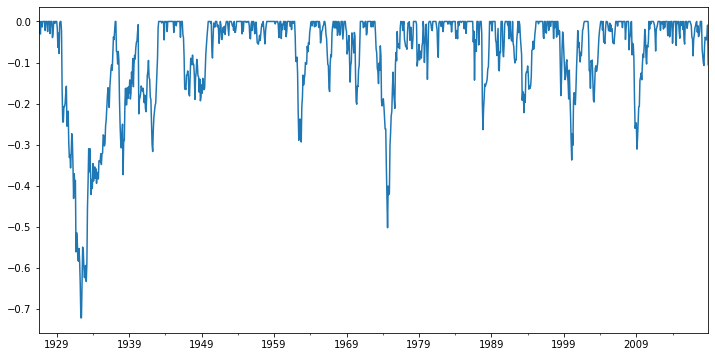

In [31]:
erk.drawdown(ind["Food"])['drawdown'].plot(figsize = (12,6));

In [33]:
r = ['Food','Smoke','Coal','Beer','Fin']
ind[r]

,Food,Smoke,Coal,Beer,Fin
1926-07,0.0056,0.0129,0.0154,-0.0519,0.0037
1926-08,0.0259,0.0650,0.0085,0.2703,0.0446
1926-09,0.0116,0.0126,0.0030,0.0402,-0.0123
1926-10,-0.0306,0.0106,0.0223,-0.0331,-0.0516
1926-11,0.0635,0.0455,-0.0048,0.0729,0.0224
...,...,...,...,...,...
2018-08,-0.0038,-0.0543,-0.0051,-0.0186,0.0245
2018-09,-0.0032,0.0537,-0.0538,0.0019,-0.0193
2018-10,0.0102,0.0790,0.0147,-0.0157,-0.0545
2018-11,0.0272,-0.0843,-0.1414,0.0579,0.0289


In [34]:
erk.var_gaussian(ind[r],modified=True)

Food     0.064071
Smoke    0.083807
Coal     0.053891
Beer     0.038229
Fin      0.079301
dtype: float64

In [37]:
erk.var_gaussian(ind,modified=True).sort_values().tail()

Carry    0.099108
Meals    0.102316
BusEq    0.103463
Games    0.106097
Mines    0.107190
dtype: float64

In [38]:
erk.var_gaussian(ind,modified=True).sort_values().head()

Beer     0.038229
Coal     0.053891
Food     0.064071
Telcm    0.067497
Hshld    0.068396
dtype: float64

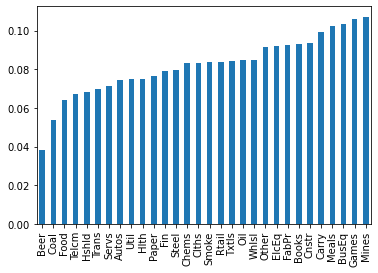

In [68]:
erk.var_gaussian(ind,modified=True).sort_values().plot.bar();

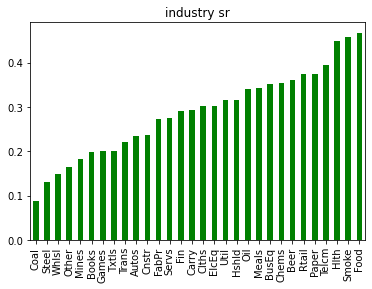

In [70]:
erk.sharp_ratio(ind,0.03,12).sort_values().plot.bar(title="industry sr",color="green");

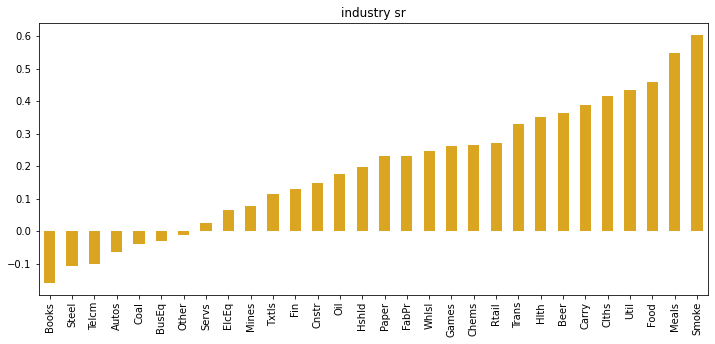

In [75]:
erk.sharp_ratio(ind['2000':],0.03,12).sort_values().plot.bar(title="industry sr",figsize=(12,5),color="goldenrod");

In [74]:
ind['2000':]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2000-01,-0.0829,-0.0228,-0.0862,0.0229,-0.0092,-0.0651,-0.1138,0.0756,-0.0933,-0.0764,...,-0.0404,-0.0973,-0.0064,-0.0878,-0.0959,0.0899,-0.1453,-0.0739,-0.0442,-0.0412
2000-02,-0.0689,-0.1164,-0.0401,-0.0177,-0.0071,-0.1157,-0.1278,-0.0288,-0.0729,-0.0584,...,-0.0359,0.0759,0.2509,-0.1142,-0.0535,0.0113,-0.0393,-0.1203,-0.0849,-0.0061
2000-03,0.0969,0.0013,0.0511,0.1052,0.1293,-0.1426,0.2506,0.0028,0.1217,0.0535,...,0.0757,0.0269,0.0456,0.0836,0.1287,0.0659,0.1436,0.1598,0.1669,-0.0016
2000-04,-0.0390,0.0368,0.0379,0.0220,-0.0734,0.0429,0.0430,0.0525,-0.0373,0.0648,...,-0.0790,-0.1655,-0.0630,-0.0109,0.0348,-0.0107,-0.0560,0.0382,-0.0425,0.0819
2000-05,0.1565,0.1187,0.1951,0.0119,-0.0593,0.0279,-0.0504,0.0394,-0.0010,-0.0328,...,-0.1041,-0.0892,-0.1165,-0.0137,-0.0363,0.0193,-0.0304,-0.0421,0.0506,0.0531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


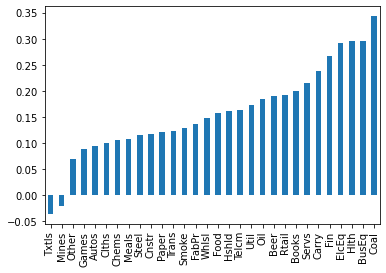

In [81]:
er = erk.an_ret(ind["1995":"2000"],12)
er.sort_values().plot.bar();

In [85]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [86]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


In [13]:
import pandas as pd
import numpy as np
import EDHEC_risk_kit as erk
import scipy.stats as ss
%load_ext autoreload
%autoreload 2

In [14]:
ind = erk.get_ind_returns()
er = erk.an_ret(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [28]:
def portfolio_return(weights,returns):
    return weights.T @ returns
def portfolio_vol(weights,covmat):
    return weights.T @ covmat @ weights ** 0.5

In [17]:
l=["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [21]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [24]:
weights = np.repeat(.25,4)

In [31]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.006063030079096045

In [30]:
erk.portfolio_return(weights,er[l])

0.19511097196038385

In [39]:
l = ["Games","Fin"]

In [48]:
a = np.linspace(0,1,20)
b = 1-a
weights = [a,b]

In [52]:
weights = [np.array([w,1-w]) for w in np.linspace(0,1,20)]
len(weights)

20

In [53]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [75]:
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vol = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]

In [76]:
ef = pd.DataFrame({"Returns":rets,"Volatility":vol})
ef

,Returns,Volatility
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


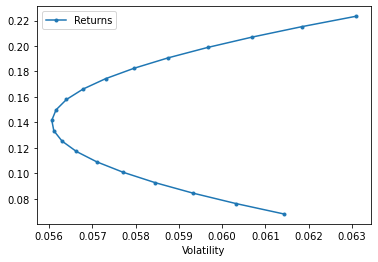

In [85]:
ef.plot.line(x="Volatility",y="Returns",style=".-");

In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
l = ["Fin","Beer"]
er[l]


Fin     0.223371
Beer    0.141126
dtype: float64

In [123]:
weights = [np.array([w,1-w]) for w in np.linspace(0,1,20)]

In [144]:
def plot_ef2(n_points, er, cov):
    weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]
    r = [erk.portfolio_return(w,er) for w in weights]
    co = [erk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ef.plot(x="vol",y="return",style="*-")

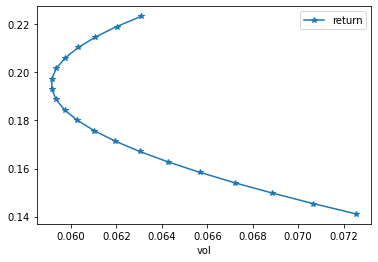

In [145]:
plot_ef2(20,er[l],cov.loc[l,l])

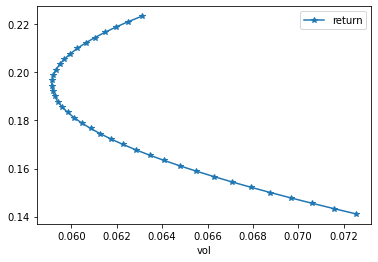

In [151]:
erk.plot_ef2(38,er[l],cov.loc[l,l])

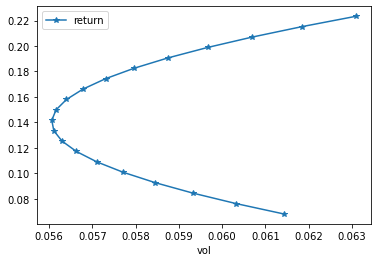

In [153]:
l=["Games","Fin"]
er[l]
cov.loc[l,l]
erk.plot_ef2(20,er[l],cov.loc[l,l])

In [171]:
n =((0.0,1.0),)*3
n

((0.0, 1.0), (0.0, 1.0), (0.0, 1.0))

In [175]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [224]:
from scipy.optimize import minimize
import numpy as np
def target_is_met(w,er):
    return target_return - erk.portfolio_return(w,er)

def minimize_vol(target_return,er,cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    return_is_target={'type':'eq',
                    'args':(er,),
                    'fun':lambda weights,er: target_return - erk.portfolio_return(weights,er)}
    weights_sum_to_1={'type':'eq',
                     'fun':lambda weights: np.sum(weights) - 1}
    results = minimize(erk.portfolio_vol,
                       init_guess,
                       args=(cov,),
                       method = "SLSQP",
                       options={"disp":False},
                       constraints = (return_is_target,weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [201]:
w15 = minimize_vol(0.15,er[l],cov.loc[l,l])
v15 = erk.portfolio_vol(w15,cov.loc[l,l])
v15

0.056163669406706564

In [225]:
minimize_vol(0.15,er[l],cov.loc[l,l])

array([0.47287631, 0.52712369])

In [227]:
erk.minimize_vol(0.15,er[l],cov.loc[l,l])

array([0.47287631, 0.52712369])

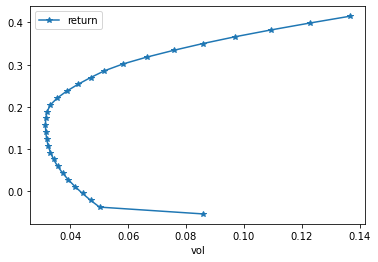

In [270]:
l = ["Smoke","Games","Fin","Coal"]
erk.plot_ef(30,er,cov)

In [313]:
def optimal_weights(n_points,er,cov):
    target_rs = np.linspace(er.min(),er.max(),n_points)
    weights = [minimize_vol(t,er,cov) for t in target_rs]
    return weights
def plot_ef(n_points, er, cov):
    weights = optimal_weights(n_points,er,cov)
    r = [erk.portfolio_return(w,er) for w in weights]
    co = [erk.portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ef.plot(x="vol",y="return",style=".-")

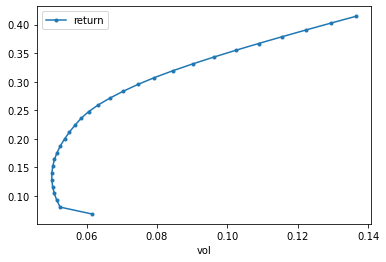

In [316]:
plot_ef(30,er[l],cov.loc[l,l])

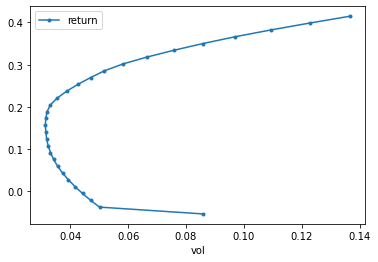

In [317]:
erk.plot_ef(30,er,cov)

In [331]:
def msr(rf,er,cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1={'type':'eq',
                     'fun':lambda weights: np.sum(weights) - 1}
    
    def neg_sharp_ratio(weights,rf,er,cov):
        r = erk.portfolio_return(weights,er)
        vol = erk.portfolio_vol(weights,cov)
        sh = -(r-rf)/vol
        return sh
    
    results = minimize(neg_sharp_ratio,
                       init_guess,
                       args=(rf,er,cov,),
                       method = "SLSQP",
                       options={"disp":False},
                       constraints = (weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [346]:
def plot_ef(n_points, er, cov,show_cml=False,rf=0):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ax = ef.plot(x="vol",y="return",style=".-")
    ax.plot()
    if show_cml:
        rf=0.1
        w_msr = msr(rf,er,cov)
        r_msr=erk.portfolio_return(w_msr,er)
        vol_msr = erk.portfolio_vol(w_msr,cov)
        cml_x = (0,vol_msr)
        cml_y = (rf,r_msr)
        ax.plot(cml_x,cml_y,color="green",marker="*",markersize=12,linewidth=2,linestyle="dashed")

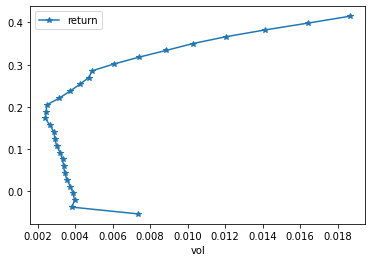

In [305]:
def plot_ef(n_points, er, cov,show_cml=False,rf=0):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ax = ef.plot(x="vol",y="return",style="*-")
    ax.plot()
    
ax = plot_ef(30,er,cov)

In [309]:
%matplotlib inline

In [373]:
plot_ef(20, er, cov)

NameError: name 'erk' is not defined

In [336]:
from scipy.optimize import minimize
import numpy as np

def msr(rf,er,cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n
    weights_sum_to_1={'type':'eq',
                     'fun':lambda weights: np.sum(weights) - 1}
    
    def neg_sharp_ratio(weights,rf,er,cov):
        r = erk.portfolio_return(weights,er)
        vol = erk.portfolio_vol(weights,cov)
        sh = -(r-rf)/vol
        return sh
    
    results = minimize(neg_sharp_ratio,
                       init_guess,
                       args=(rf,er,cov,),
                       method = "SLSQP",
                       options={"disp":False},
                       constraints = (weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x

In [371]:
a = msr(0.1,er,cov)
b=erk.portfolio_return(a,er)
c=erk.portfolio_vol(a,cov)

In [359]:
a

array([2.64065834e-15, 0.00000000e+00, 4.39320620e-15, 3.78074781e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.55961447e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.30396001e-15, 2.33810838e-01, 0.00000000e+00, 3.61249024e-15,
       0.00000000e+00, 1.38704161e-01, 2.60112580e-15, 8.94092020e-02,
       3.87122641e-16, 0.00000000e+00, 1.55177125e-02, 1.14856279e-15,
       0.00000000e+00, 2.31666644e-15, 6.65966392e-02, 6.73298217e-16,
       1.56599349e-15, 0.00000000e+00])

In [360]:
b

0.2647394793106738

In [361]:
c

0.04571973132039177

In [364]:
optimal_weights(20,er,cov)

[array([0.00000000e+00, 0.00000000e+00, 1.29549149e-14, 1.01238462e-14,
        1.74860126e-15, 0.00000000e+00, 2.60208521e-15, 1.73472348e-15,
        0.00000000e+00, 1.74275543e-08, 0.00000000e+00, 6.55725474e-15,
        1.91652250e-14, 3.35842465e-15, 0.00000000e+00, 6.62664368e-15,
        9.99999983e-01, 1.00267017e-14, 0.00000000e+00, 1.00822128e-14,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.86576318e-15, 3.26128013e-16, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.10942375e-15]),
 array([7.88256128e-18, 0.00000000e+00, 2.18344596e-02, 3.56702515e-17,
        8.98482671e-18, 2.55126253e-17, 0.00000000e+00, 0.00000000e+00,
        6.47369984e-18, 6.56136810e-01, 1.71823992e-18, 0.00000000e+00,
        1.20280428e-17, 1.36945396e-17, 6.23803490e-18, 1.14250031e-18,
        2.06179674e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.67450992e-18

In [378]:
def plot_ef(n_points, er, cov,show_cml=False,rf=0):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ax = ef.plot(x="vol",y="return",style=".-")
    ax.plot()
    if show_cml:
        rf=0.1
        w_msr = msr(rf,er,cov)
        r_msr=erk.portfolio_return(w_msr,er)
        vol_msr = erk.portfolio_vol(w_msr,cov)
        cml_x = (0,vol_msr)
        cml_y = (rf,r_msr)
        ax.plot(cml_x,cml_y,color="green",marker="*",markersize=12,linewidth=2,linestyle="dashed")
        
        
def optimal_weights(n_points,er,cov):
    target_rs = np.linspace(er.min(),er.max(),n_points)
    weights = [minimize_vol(t,er,cov) for t in target_rs]
    return weights

In [387]:
m = optimal_weights(20,er,cov)[6]
erk.portfolio_vol(m,cov)

0.03305277494917839

In [382]:
erk.portfolio_return(m,er)

-0.028910050363810582

In [390]:
def plot_ef(n_points, er, cov,show_cml=False,rf=0):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    return ef

In [391]:
plot_ef(20,er,cov)

,return,vol
0,-0.053554,0.007368
1,-0.028910,0.003830
2,-0.004266,0.003888
3,0.020379,0.003645
4,0.045023,0.003434
5,0.069668,0.003363
6,0.094312,0.003214
7,0.118956,0.002921
8,0.143601,0.002841
9,0.168245,0.002509


In [393]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,...,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,...,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,...,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,...,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,...,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,...,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,...,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,...,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,...,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,...,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


In [394]:
ind = erk.get_ind_returns()
er = erk.an_ret(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [415]:
def plot_ef(n_points, er, cov,show_cml=False):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ax = ef.plot(x="vol",y="return",style=".-")
    ax.plot()

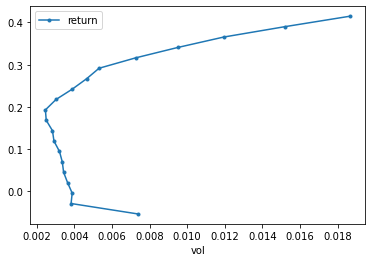

In [416]:
plot_ef(20,er,cov)

In [412]:
l = ["Food","Steel"]

In [413]:
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040362, 0.24959638])

In [414]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [431]:
import pandas as pd
import numpy as np
import EDHEC_risk_kit as erk
def gmv(cov):
    n = cov.shape[0]
    return erk.msr(0,np.repeat(1,n),cov)
def plot_ef(n_points, er, cov,show_cml=False,rf=0,show_ew=False,show_gmv = False):
    weights = optimal_weights(n_points,er,cov)
    r = [portfolio_return(w,er) for w in weights]
    co = [portfolio_vol(w,cov) for w in weights]
    ef = pd.DataFrame({"return":r,"vol":co})
    ax = ef.plot(x="vol",y="return",style=".-")
    ax.plot()
    if show_ew:
        n = er.shape[0]
        ew = np.repeat(1/n,n)
        r_ew = portfolio_return(ew,er)
        vol_ew = portfolio_vol(ew,cov)
        ax.plot([vol_ew],[r_ew],color="goldenrod",marker = "o",markersize=12)
    if show_gmv:
        w_gmv= gmv(cov)
        r_gmv = portfolio_return(w_gmv,er)
        vol_gmv = portfolio_vol(w_gmv,cov)
        ax.plot([vol_gmv],[r_gmv],color="goldenrod",marker = "o",markersize=12)      
    if show_cml:
        rf=0.1
        w_msr = msr(rf,er,cov)
        r_msr=erk.portfolio_return(w_msr,er)
        vol_msr = erk.portfolio_vol(w_msr,cov)
        cml_x = (0,vol_msr)
        cml_y = (rf,r_msr)
        ax.plot(cml_x,cml_y,color="green",marker="*",markersize=12,linewidth=2,linestyle="dashed")
    

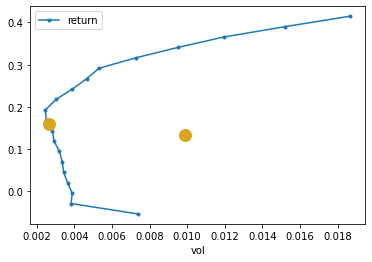

In [438]:
plot_ef(20,er,cov,show_ew = True,show_gmv = True)

In [569]:
hfi = erk.get_hfi_returns()
hfi = hfi["2000":]
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,0.0227,0.0128,0.0088,0.0077,0.0075,0.0088,0.0041,0.0021,0.0075,0.0143,0.0173,0.0427,0.0169
2000-02,0.0267,-0.0022,0.0421,0.0528,0.0253,0.0346,0.0097,0.0408,0.0699,0.0239,0.0185,-0.1340,0.0666
2000-03,0.0243,-0.0138,0.0103,0.0318,0.0134,0.0069,-0.0061,-0.0104,0.0006,0.0131,0.0163,-0.0230,0.0039
2000-04,0.0223,-0.0241,-0.0101,-0.0541,0.0168,-0.0059,-0.0006,-0.0304,-0.0201,0.0188,0.0092,0.1028,-0.0269
2000-05,0.0149,0.0114,-0.0132,-0.0433,0.0062,-0.0034,0.0107,-0.0070,-0.0097,0.0146,0.0080,0.0704,-0.0122


In [445]:
erk.var_gaussian(hfi,level = 1,modified = True)

Convertible Arbitrage     0.091664
CTA Global                0.030415
Distressed Securities     0.038193
Emerging Markets          0.067527
Equity Market Neutral     0.035899
Event Driven              0.034767
Fixed Income Arbitrage    0.059280
Global Macro              0.014078
Long/Short Equity         0.038104
Merger Arbitrage          0.015322
Relative Value            0.040935
Short Selling             0.068259
Funds Of Funds            0.039060
dtype: float64

In [447]:
 erk.var_historical(hfi,level=1)

Convertible Arbitrage     0.01435
CTA Global                0.03167
Distressed Securities     0.01958
Emerging Markets          0.03907
Equity Market Neutral     0.00848
Event Driven              0.02561
Fixed Income Arbitrage    0.00627
Global Macro              0.01472
Long/Short Equity         0.02631
Merger Arbitrage          0.01078
Relative Value            0.01162
Short Selling             0.06557
Funds Of Funds            0.02169
dtype: float64

In [588]:
ind = erk.get_ind_returns() 

In [589]:
ind = ind["2013":"2017"]
ind = ind[["Books","Steel","Oil","Mines"]]
ind

,Books,Steel,Oil,Mines
2013-01,0.0513,0.0428,0.0788,0.0059
2013-02,-0.0654,-0.0268,0.0052,-0.0756
2013-03,0.0778,0.0210,0.0209,0.0091
2013-04,-0.0029,-0.0441,-0.0129,-0.1057
2013-05,0.0479,0.0384,0.0307,0.0022
2013-06,0.0246,-0.0472,-0.0211,-0.0959
2013-07,0.1207,0.0697,0.0496,0.0002
2013-08,-0.0488,-0.0275,-0.0193,0.0459
2013-09,0.0626,0.0835,0.0189,0.0116
2013-10,0.0718,0.0838,0.0472,0.0534


In [592]:
ret = erk.an_ret(ind,12)
cov=ind.cov()

In [606]:
t = erk.msr(0.1,ret,cov)
t

array([7.01522174e-15, 1.00000000e+00, 1.91686944e-16, 0.00000000e+00])

In [485]:
erk.gmv(cov)

array([0.47702487, 0.        , 0.43411203, 0.08886311])

In [486]:
ind.columns

Index(['Books', 'Steel', 'Oil', 'Mines'], dtype='object')

In [503]:
ret2=erk.an_ret(ind["2018"],12)

In [496]:
ind["2018"]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-01,0.0238,-0.0011,0.0013,0.1726,0.0449,-0.0198,0.0729,0.0638,0.0170,0.0160,...,0.0318,0.0925,0.0501,0.0438,0.0268,0.0483,0.1156,0.0323,0.0611,0.0551
2018-02,-0.0675,-0.0676,-0.0662,0.0109,-0.0325,-0.0625,-0.0195,-0.0390,-0.0512,-0.1235,...,-0.0732,-0.0169,0.0205,-0.0528,-0.0665,-0.0556,-0.0472,-0.0419,-0.0255,-0.0444
2018-03,-0.0187,0.0127,-0.0165,-0.0017,0.0031,0.0210,0.0064,-0.0200,-0.0186,-0.0214,...,-0.0252,-0.0331,-0.0292,-0.0435,0.0053,-0.0104,-0.0325,-0.0054,-0.0338,-0.0340
2018-04,-0.0167,-0.0429,-0.1416,0.0331,-0.0062,-0.0531,0.0316,-0.0028,0.0071,-0.0954,...,-0.0241,0.0118,-0.0195,-0.0609,0.0050,0.0083,0.0429,0.0350,0.0118,-0.0190
2018-05,-0.0078,-0.0119,-0.0187,0.0902,-0.0061,-0.0024,0.0421,0.0243,0.0242,-0.0136,...,-0.0093,0.0586,0.0784,0.0079,0.0486,0.0169,0.0136,-0.0195,0.0040,-0.0038
2018-06,0.0540,0.0442,0.0307,0.0496,0.0218,0.0362,0.0698,0.0152,0.0033,0.0336,...,0.0623,0.0107,-0.0190,-0.0044,-0.0365,0.0023,0.0436,-0.0289,-0.0098,-0.0204
2018-07,0.0221,0.0350,0.0524,-0.0612,-0.0417,0.0232,0.0035,0.0612,0.0485,-0.0889,...,0.0268,0.0203,0.0277,0.0595,0.0791,0.0239,0.0355,0.0116,0.0426,0.0604
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599


In [501]:
cov = ind["2018"].cov()

In [502]:
erk.an_vol(ind["2018"],12)

Food     0.144156
Beer     0.156136
Smoke    0.264688
Games    0.291789
Books    0.183266
Hshld    0.137865
Clths    0.184952
Hlth     0.185480
Chems    0.178718
Txtls    0.299614
Cnstr    0.195801
Steel    0.219840
FabPr    0.220059
ElcEq    0.248222
Autos    0.164992
Carry    0.238839
Mines    0.157180
Coal     0.228184
Oil      0.252093
Util     0.099198
Telcm    0.154368
Servs    0.184387
BusEq    0.205861
Paper    0.197314
Trans    0.237872
Whlsl    0.171352
Rtail    0.230279
Meals    0.129323
Fin      0.164694
Other    0.151153
dtype: float64

In [511]:
ret2[["Books","Steel","Oil","Mines"]]
ind = ind["2018"][["Books","Steel","Oil","Mines"]]
ind

,Books,Steel,Oil,Mines
2018-01,0.0449,0.0361,0.0286,0.0357
2018-02,-0.0325,-0.0199,-0.1102,-0.0335
2018-03,0.0031,-0.0586,0.0308,-0.0015
2018-04,-0.0062,0.0366,0.1030,-0.0339
2018-05,-0.0061,0.0562,0.0343,0.0308
2018-06,0.0218,-0.0514,0.0052,-0.0178
2018-07,-0.0417,0.0424,0.0104,-0.0224
2018-08,-0.0447,-0.0323,-0.0295,-0.1075
2018-09,-0.0221,-0.0067,0.0356,-0.0173
2018-10,-0.0666,-0.1161,-0.1206,-0.1032


In [513]:
erk.an_vol(ind,12)

Books    0.183266
Steel    0.219840
Oil      0.252093
Mines    0.157180
dtype: float64

In [514]:
ind.shape

(12, 4)

In [517]:
t = [7.01522174e-15, 1.00000000e+00, 1.91686944e-16, 0.00000000e+00]
t

[7.01522174e-15, 1.0, 1.91686944e-16, 0.0]

In [520]:
type(ind)

pandas.core.frame.DataFrame

In [542]:
r = ind*t
r

,Books,Steel,Oil,Mines
2018-01,3.149835e-16,0.0361,5.482247e-18,0.0
2018-02,-2.279947e-16,-0.0199,-2.112390e-17,-0.0
2018-03,2.174719e-17,-0.0586,5.903958e-18,-0.0
2018-04,-4.349437e-17,0.0366,1.974376e-17,-0.0
2018-05,-4.279285e-17,0.0562,6.574862e-18,0.0
2018-06,1.529318e-16,-0.0514,9.967721e-19,-0.0
2018-07,-2.925347e-16,0.0424,1.993544e-18,-0.0
2018-08,-3.135804e-16,-0.0323,-5.654765e-18,-0.0
2018-09,-1.550364e-16,-0.0067,6.824055e-18,-0.0
2018-10,-4.672138e-16,-0.1161,-2.311745e-17,-0.0


In [546]:
r1 = r["Books"]
r2 = r["Steel"]
r3= r["Oil"]
r4=r["Mines"]

In [549]:
tr = r1+r2+r3+r4
tr

2018-01    0.0361
2018-02   -0.0199
2018-03   -0.0586
2018-04    0.0366
2018-05    0.0562
2018-06   -0.0514
2018-07    0.0424
2018-08   -0.0323
2018-09   -0.0067
2018-10   -0.1161
2018-11   -0.0300
2018-12   -0.1478
Freq: M, dtype: float64

In [551]:
erk.an_vol(tr,12)

0.2198398818148427

In [554]:
t = [0.47702487, 0.        , 0.43411203, 0.08886311]
t

[0.47702487, 0.0, 0.43411203, 0.08886311]

In [557]:
tr = ind*t
tr

,Books,Steel,Oil,Mines
2018-01,0.021418,0.0,0.012416,0.003172
2018-02,-0.015503,-0.0,-0.047839,-0.002977
2018-03,0.001479,-0.0,0.013371,-0.000133
2018-04,-0.002958,0.0,0.044714,-0.003012
2018-05,-0.002910,0.0,0.014890,0.002737
2018-06,0.010399,-0.0,0.002257,-0.001582
2018-07,-0.019892,0.0,0.004515,-0.001991
2018-08,-0.021323,-0.0,-0.012806,-0.009553
2018-09,-0.010542,-0.0,0.015454,-0.001537
2018-10,-0.031770,-0.0,-0.052354,-0.009171


In [562]:
r1 = tr["Books"]
r2 = tr["Steel"]
r3= tr["Oil"]
r4=tr["Mines"]

In [566]:
trr = r1+r2+r3+r4
trr

2018-01    0.037006
2018-02   -0.066319
2018-03    0.014716
2018-04    0.038744
2018-05    0.014717
2018-06    0.011075
2018-07   -0.017368
2018-08   -0.043682
2018-09    0.003375
2018-10   -0.093294
2018-11    0.004544
2018-12   -0.137017
Freq: M, dtype: float64

In [570]:
erk.an_vol(trr,12)

0.18973734691197175

In [575]:
np.percentile(hfi,1,axis=0)

array([-0.031674, -0.050938, -0.042642, -0.065496, -0.0198  , -0.03854 ,
       -0.030748, -0.022632, -0.04506 , -0.022654, -0.021788, -0.107684,
       -0.0272  ])

In [586]:
type(hfi)

pandas.core.frame.DataFrame

In [587]:
erk.var_gaussian(hfi,level=1,modified=True)

Convertible Arbitrage     0.102857
CTA Global                0.046508
Distressed Securities     0.049460
Emerging Markets          0.086460
Equity Market Neutral     0.041102
Event Driven              0.045554
Fixed Income Arbitrage    0.065775
Global Macro              0.022692
Long/Short Equity         0.051207
Merger Arbitrage          0.021203
Relative Value            0.048685
Short Selling             0.097939
Funds Of Funds            0.048577
dtype: float64